In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
# File to Load
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw = pd.read_csv(olympic_csv)
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games

# this is our dataframe for summer olympic data, post WW2.
summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
# this is our dataframe for winter olympic data, post WW2.
winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]

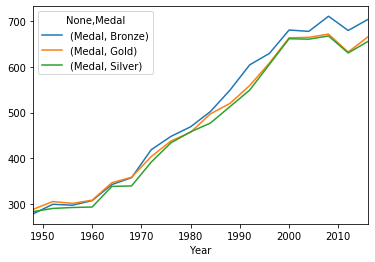

In [4]:
# group summer games by country
grouped_noc = summer_olympics.groupby(["Year"])
grouped_noc

medal_count_summer = grouped_noc["Medal"].value_counts()
medal_count_summer

medal_count_summer_df = pd.DataFrame(medal_count_summer).unstack()
medal_count_summer_df

medal_summer_graph = medal_count_summer_df.plot.line()


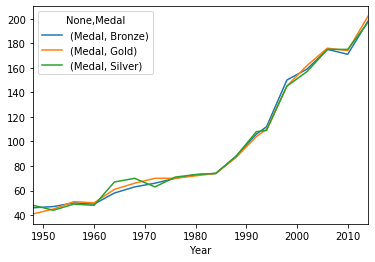

In [6]:
# group winter games by country
grouped_noc = winter_olympics.groupby(["Year"])
grouped_noc

medal_count_winter = grouped_noc["Medal"].value_counts()
medal_count_winter

medal_count_winter_df = pd.DataFrame(medal_count_winter).unstack()
medal_count_winter_df

medal_summer_graph = medal_count_winter_df.plot.line()


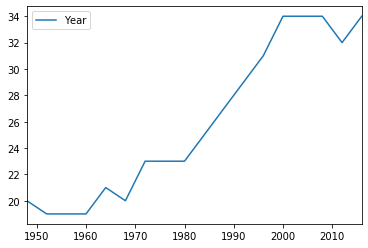

In [20]:
# GROWTH OF SPORTING EVENTS BY SUMMER OLYMPIC GAMES.

# groupt the games by year
grouped_year = summer_olympics.groupby(["Year"])
grouped_year

# group the previously grouped index by sport (year and sport)
sport_count = grouped_year["Sport"].value_counts()
sport_count

# create a dataframe
sport_count_df = pd.DataFrame(sport_count)
sport_count_final = sport_count_df.rename(columns={"Sport": "Athlete Count"})

# reset the index 
sport_count_per_year = sport_count_final.reset_index()
sport_count_per_year
# value count per sport to aggregate sports per year
sport_count = sport_count_per_year["Year"].value_counts()

# create dataframe
sport_count_df = pd.DataFrame(sport_count)

# sort
sport_count_sort = sport_count_df.sort_index()

# plot line graph
sport_line = sport_count_sort.plot.line()


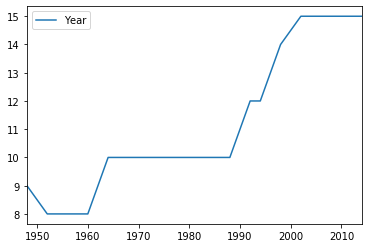

In [21]:
# groupt the games by year
grouped_year = winter_olympics.groupby(["Year"])
grouped_year

# group the previously grouped index by sport (year and sport)
sport_count = grouped_year["Sport"].value_counts()
sport_count

# create a dataframe
sport_count_df = pd.DataFrame(sport_count)
sport_count_final = sport_count_df.rename(columns={"Sport": "Athlete Count"})

# reset the index 
sport_count_per_year = sport_count_final.reset_index()
sport_count_per_year
# value count per sport to aggregate sports per year
sport_count = sport_count_per_year["Year"].value_counts()

# create dataframe
sport_count_df = pd.DataFrame(sport_count)

# sort
sport_count_sort = sport_count_df.sort_index()

# plot line graph
sport_line = sport_count_sort.plot.line()

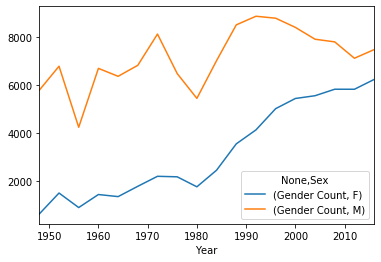

In [78]:
#GENDER RATIO BY SUMMER OLYMPIC GAMES - LINE GRAPH

grouped_year = summer_olympics.groupby(["Year"])
grouped_year

gender_count = grouped_year["Sex"].value_counts()
gender_count

gender_count_df = pd.DataFrame(gender_count).unstack()
gender_count_df

gender_count_rename = gender_count_df.rename(columns={"Sex": "Gender Count"})
gender_count_rename

gender_line_graph = gender_count_rename.plot.line()

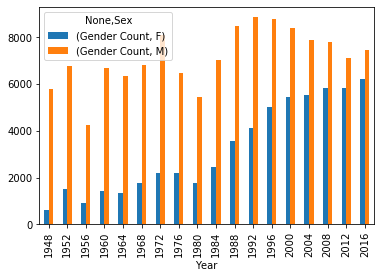

In [80]:
#GENDER RATIO BY SUMMER OLYMPIC GAMES - BAR GRAPH

gender_line_graph = gender_count_rename.plot.bar()

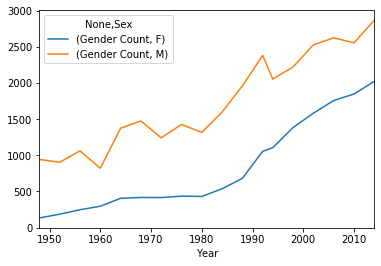

In [82]:
#GENDER RATIO BY WINTER OLYMPIC GAMES - LINE GRAPH

grouped_year = winter_olympics.groupby(["Year"])
grouped_year

gender_count = grouped_year["Sex"].value_counts()
gender_count

gender_count_df = pd.DataFrame(gender_count).unstack()
gender_count_df

gender_count_rename = gender_count_df.rename(columns={"Sex": "Gender Count"})
gender_count_rename

gender_line_graph = gender_count_rename.plot.line()

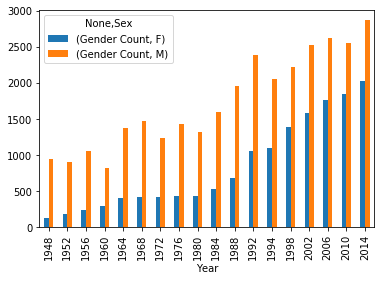

In [83]:
#GENDER RATIO BY WINTER OLYMPIC GAMES - BAR GRAPH

gender_line_graph = gender_count_rename.plot.bar()